In [21]:
"""
Reads a txt file from the DAM3 Program and returns an organized CSV file.

"""


import numpy as np
import pandas as pd

#Function that reads a text file name (fileName parameter), and converts it into a CSV via a user given name (csvFileName parameter)
def txtFileReader(fileName:str, csvFileName:str):
    #Reads a text file
    df = pd.read_csv(fileName, delimiter = "\t", header = None)

    #Headers for the columns are assigned
    colHeaders = {0:"Index", 1:"Date", 2:"Time", 3:"Monitor Status", 4:"Extra Readings Count", 5:"Monitor Number", 6:"Tube Number", 7:"Data Type", 8:"Unused", 9:"Light Sensor"}

    #This section of code assigns each spider a specfific call code in the format "SP{number}"
    count = len(colHeaders)
    for i in range(1, (len(df.columns)-len(colHeaders))+1):
        colHeaders[count] = "SP" + str(i)
        count = count + 1

    #This section of code assigns the index as the leftmost column
    df.rename(columns = colHeaders, inplace = True)
    df.set_index("Index", inplace = True)
    
    #Filters out the invalid monitor status data
    df = df[df["Monitor Status"] < 50]
    df.to_csv(csvFileName)
    
#Actual Code Here
txtFileReader('Steatoda A LD and DD January 18-February 1 2024.txt', "STE A Group LD and DD Jan 18_Feb 1.csv")

In [22]:
"""
Alters the DataFrame/csv to only include spider data, date, time, and index
"""
import numpy as np
import pandas as pd

def spiderDataSimplifier(fileName:str, resultingCsvFileName:str):
    df = pd.read_csv(fileName, index_col = 0)
    df_copy = df
    df_copy = df_copy.drop(columns = ["Monitor Status", "Extra Readings Count", "Monitor Number", "Tube Number", "Data Type", "Unused", "Light Sensor"])
    df_copy.to_csv(resultingCsvFileName)
spiderDataSimplifier("STE A Group LD and DD Jan 18_Feb 1.csv", "STE A Group LD and DD Dropped Columns Jan 18_Feb 1.csv")


Please type in what cycle(s) the data consists of (LL, LD, DD, or enter a space to escape):  


C:\Users\18595\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


'def hourCalculator(fileName:str, spiderName:str):\n    df = pd.read_csv(fileName)\n    hourDict = {}\n    hours = [i for i in range(25)]\n    spiderData = {}\n    startTime = 0\n    startTimeHr = 0\n    startTimeMin = 0\n    hour = 0\n    freqList = []\n\n    for i in range(len(df.columns)):\n        if i !=1 and df["Time"][i] == startTime:\n            hour = 0\n        if 0 != startTimeHr and 0 == startTimeMin:\n            hour += 1\n        else:\n            spiderData[hour] = freqList.append(df[spiderName][i])\n    print(spiderData)\n    \n    #df["Time"][i][3, 5] right\n    #df["Time"][i][0, 2] left\n    #Code using hour, minute format.\n'

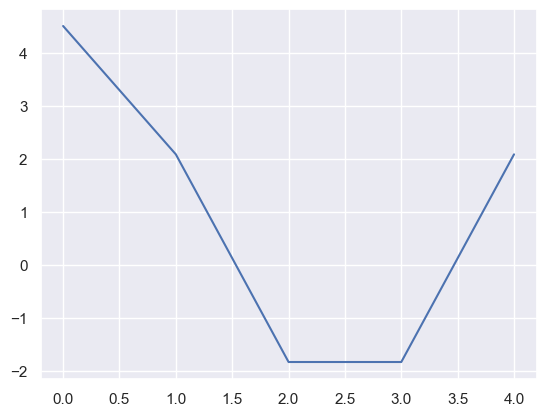

In [17]:
"""
Organizes Data into *Data Structure* for every 24 hour cycle for all spiders, and graphs them

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fft
sns.set()

#Use if no data from CSV File avaliable to import
cycleList = []
periodList = []
def manualInput(l1, l2):
    cycle = input("Please type in what cycle(s) the data consists of (LL, LD, DD, or enter a space to escape): ")
    while cycle != " ":
        cycleList.append(cycle)
        period = int(input("Please type in the period(s) for each cycle: "))
        periodList.append(period)
        cycle = input("Please type in what cycle(s) the data consists of (LL, LD, DD, or enter a space to escape): ")

def fourierTransformFromCSV(fileName:str):
    df = pd.read_csv(fileName)
    x = np.array(df["SP3"])
    y = fft(df["SP3"])
    #hourCalculator("STE A Group LL Dropped Columns Dec 27_Jan 8.csv", "SP2")
    
def fourierTransformManualData(fileName:str, cycleList:list, periodList:list):
    df = pd.read_csv(fileName)
    x = np.array(df["SP3"])
    y = fft(df["SP3"])
    x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
    y = fft(x)
    plt.plot(y)
    #hourCalculator("STE A Group LL Dropped Columns Dec 27_Jan 8.csv", "SP17")
    #hourCalculator("STE A Group LL Dropped Columns Dec 27_Jan 8.csv", "SP2")
    
    
    

manualInput(cycleList, periodList)
fourierTransformManualData("STE A Group LL Dropped Columns Dec 27_Jan 8.csv", cycleList, periodList)

#For ONE spider only
"""def hourCalculator(fileName:str, spiderName:str):
    df = pd.read_csv(fileName)
    hourDict = {}
    hours = [i for i in range(25)]
    spiderData = {}
    startTime = 0
    startTimeHr = 0
    startTimeMin = 0
    hour = 0
    freqList = []

    for i in range(len(df.columns)):
        if i !=1 and df["Time"][i] == startTime:
            hour = 0
        if 0 != startTimeHr and 0 == startTimeMin:
            hour += 1
        else:
            spiderData[hour] = freqList.append(df[spiderName][i])
    print(spiderData)
    
    #df["Time"][i][3, 5] right
    #df["Time"][i][0, 2] left
    #Code using hour, minute format.
"""
    



In [106]:
"""
Graphs the data of SP 7 in our dataset in the Individual Period Analysis

"""
#First, let's make a dataframe based off of days 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fft
import datetime
sns.set()

df = pd.read_csv("STE A Group LD and DD Jan 18_Feb 1.csv")
df_copy = df.copy()
df_copy= df[["Date", "Time", "SP17"]]
df_copy["Time1"] = df_copy["Time"]
df_copy["Time"] = pd.to_datetime(df_copy["Date"] + " " + df_copy["Time"])

dayDict = {day: i+1 for i, day in enumerate(df_copy["Time"].dt.day.unique())}
df_copy.insert(0, 'Day', df_copy['Time'].dt.day.map(dayDict))

#Time converter
df_copy["Time1"] = pd.to_datetime(df_copy["Time1"])

hourDict = {hour: i+1 for i, hour in enumerate(df_copy["Time1"].dt.hour.unique())}
df_copy.insert(1, 'Hour', df_copy['Time1'].dt.hour.map(hourDict))

df_copy = df_copy.drop(["Time1", "Date"], axis = 1)
    
df_copy.set_index("Day", inplace = True)
print(df_copy)

df_copy.to_csv("STE A Group SP17 LD and DD Dropped Columns Jan 18_Feb 1.csv")


C:\Users\18595\AppData\Local\Temp\ipykernel_14768\662911668.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Time1"] = df_copy["Time"]
C:\Users\18595\AppData\Local\Temp\ipykernel_14768\662911668.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Time"] = pd.to_datetime(df_copy["Date"] + " " + df_copy["Time"])
C:\Users\18595\AppData\Local\Temp\ipykernel_14768\662911668.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

     Hour                Time  SP17
Day                                
1       1 2024-01-18 13:17:00     5
1       1 2024-01-18 13:18:00     1
1       1 2024-01-18 13:19:00     2
1       1 2024-01-18 13:20:00     1
1       1 2024-01-18 13:21:00     3
..    ...                 ...   ...
15      5 2024-02-01 17:33:00     0
15      5 2024-02-01 17:34:00     0
15      5 2024-02-01 17:35:00     0
15      5 2024-02-01 17:36:00     0
15      5 2024-02-01 17:37:00     0

[20421 rows x 3 columns]


C:\Users\18595\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


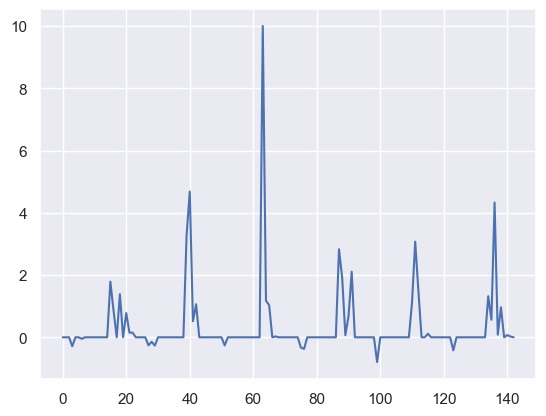

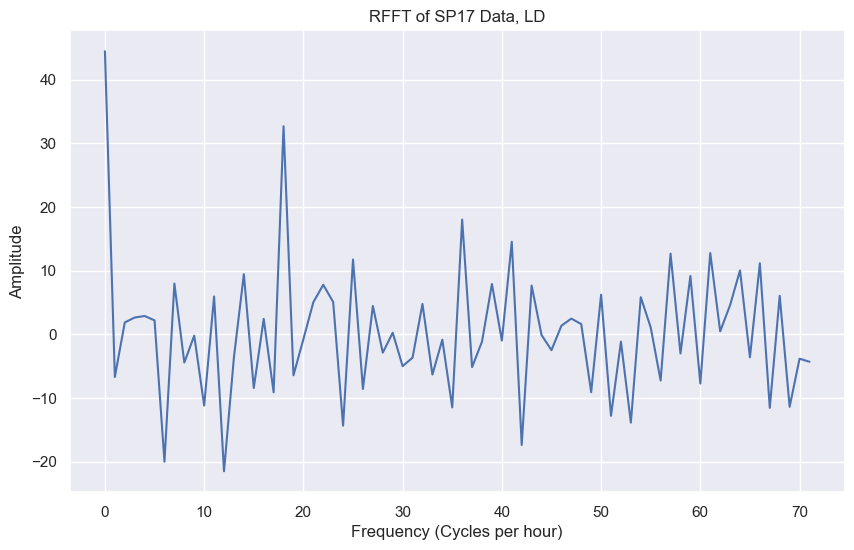

Peak Frequency: 0.04195804195804196 cycles per hour
Dominant Period: 23.833333333333332 hours


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft, rfft, rfftfreq
sns.set()

df = pd.read_csv("STE A Group SP17 LD and DD Dropped Columns Jan 18_Feb 1.csv")
df = df.drop(["Time"], axis = 1)

df_ld = df[df["Day"] <= 7] 
df_ld = df_ld[df_ld["Day"] > 1]
df_dd = df[df["Day"] >= 8]
df.set_index("Day", inplace = True)



#df_ld = df_ld.drop(["Day"], axis = 1)
#df_ld.set_index("Hour", inplace = True)


df_dd = df_dd[df_dd["Day"] > 1]
#df_dd = df_dd.drop(["Day"], axis = 1)
#df_dd.set_index("Hour", inplace = True)

#plt.bar(df_ld["Hour"], height=df_ld["SP17"])
#plt.show()
df_ld = df_ld.reset_index()
df_ld = df_ld.drop(["index"], axis = 1)
sinList = []
amplitude = []
hour = df_ld["Hour"][0]
for i in range(df_ld.shape[0]):
    if hour != df_ld["Hour"][i]:
        hour = df_ld["Hour"][i]
        aCopy = amplitude.copy()
        sinList.append((sum(aCopy)/len(aCopy)) * np.sin(2*np.pi*hour/24))
        amplitude.clear()
        
    amplitude.append(df_ld["SP17"][i])
plt.plot(sinList)
    #time.append(float(df_ld["Hour"][i])*((2*np.pi)/24))
# Perform Fourier Transform
fftResult = fft(sinList)
#plt.plot(fftResult)

# Plotting the RFFT results
#Note: Since our data is real valued, we only need the positive values. We can disregard the negative values.
#RFFT may be better since our data was real valued, meaning it had no imagenary numbers in it. 
#RFFT is best for real valued data
plt.figure(figsize=(10, 6))
plt.plot((rfftResult))
plt.title('RFFT of SP17 Data, LD')
plt.xlabel('Frequency (Cycles per hour)')
plt.ylabel('Amplitude')
plt.show()

# Perform Real Fourier Transform
N = len(sinList)  # Number of sample points
T = 1.0   # Sample spacing (1 Hour)
rfftResult = rfft(sinList)
xf = rfftfreq(N, T)  # Frequency bins for RFFT

# Identify the peak frequency
idx_peak = np.argmax(np.abs(rfftResult))  # Index of peak frequency
peak_frequency = xf[idx_peak]  # Peak frequency in cycles per hour
dominant_period_hours = 1 / peak_frequency  # Period in hours

print(f"Peak Frequency: {peak_frequency} cycles per hour")
print(f"Dominant Period: {dominant_period_hours} hours")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft, rfft, fftfreq
sns.set()

df = pd.read_csv("STE A Group SP17 LD and DD Dropped Columns Jan 18_Feb 1.csv")
df = df.drop(["Time"], axis = 1)

df_dd = df[df["Day"] >= 8]
df.set_index("Day", inplace = True)



#df_dd = df_dd[df_dd["Day"] > 8]

df_dd = df_dd.reset_index()
df_dd = df_dd.drop(["index"], axis = 1)

sinList = []
amplitude = []
hour = df_dd["Hour"][0]
for i in range(df_dd.shape[0]):
    if hour != df_dd["Hour"][i]:
        hour = df_dd["Hour"][i]
        aCopy = amplitude.copy()
        sinList.append((sum(aCopy)/len(aCopy)) * np.sin(2*np.pi*hour/24))
        amplitude.clear()
        
    amplitude.append(df_dd["SP17"][i])
    
# Perform Fourier Transform
rfftResult = rfft(sinList)
plt.plot(sinList)
# Plotting the RFFT results
#Note: Since our data is real valued, we only need the positive values. We can disregard the negative values.
#RFFT may be better since our data was real valued, meaning it had no imagenary numbers in it. 
#RFFT is best for real valued data
plt.figure(figsize=(10, 6))
plt.plot((rfftResult))
plt.title('RFFT of SP17 Data, DD')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
#plt.plot(fft(sinList))

# Perform Real Fourier Transform
N = len(sinList)  # Number of sample points
T = 1.0     # Sample spacing (1 Hour)
rfftResult = rfft(sinList)
xf = rfftfreq(N, T)  # Frequency bins for RFFT

# Identify the peak frequency
idx_peak = np.argmax(np.abs(rfftResult[1:])) + 1 # Index of peak frequency
peak_frequency = xf[idx_peak]  # Peak frequency in cycles per hour
dominant_period_hours = 1 / peak_frequency  # Period in hours

print(f"Peak Frequency: {peak_frequency} cycles per hour")
print(f"Dominant Period: {dominant_period_hours} hours")

FileNotFoundError: [Errno 2] No such file or directory: 'STE A Group SP17 LD and DD Dropped Columns Jan 18_Feb 1.csv'

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft, rfft, fftfreq
sns.set()

df = pd.read_csv("STE A Group SP17 LD and DD Dropped Columns Jan 18_Feb 1.csv")
df = df.drop(["Time"], axis = 1)

df_dd = df[df["Day"] >= 8]
df.set_index("Day", inplace = True)



#df_dd = df_dd[df_dd["Day"] > 8]

df_dd = df_dd.reset_index()
df_dd = df_dd.drop(["index"], axis = 1)

sinList = []
amplitude = []
hour = df_dd["Hour"][0]
for i in range(df_dd.shape[0]):
    if hour != df_dd["Hour"][i]:
        hour = df_dd["Hour"][i]
        aCopy = amplitude.copy()
        sinList.append(sum(aCopy)/len(aCopy) * np.sin(2*np.pi*hour/24))
        amplitude.clear()
        
    amplitude.append(df_dd["SP17"][i])
    

# Compute rfft
fft_vals = np.fft.rfft(sinList)

# Get frequencies
n = len(sinList)
freqs = rfftfreq(n, d=1/n)  # d is the sample spacing

# Find dominant frequency index 
dominant_freq_idx = np.argmax(np.abs(fft_vals[1:])) + 1  # Skip DC

# Get period in hours
period_hours = (1 / freqs[dominant_freq_idx])

print(f"The dominant period is {period_hours:.2f} hours")

The dominant period is 0.12 hours
